In [1]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
# Fill missing reviews_per_month with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Remove extreme price outliers (above 1000)
df = df[df["price"] < 1000]

# Check new max price
df["price"].max()

999

In [8]:
df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        177.366747
Brooklyn         117.235564
Staten Island     96.148649
Queens            94.528038
Bronx             84.443526
Name: price, dtype: float64

In [9]:
df.groupby("neighbourhood_group")["number_of_reviews"].mean().sort_values(ascending=False)

neighbourhood_group
Staten Island    31.191892
Queens           27.761189
Bronx            26.052342
Brooklyn         24.264161
Manhattan        21.118100
Name: number_of_reviews, dtype: float64

In [10]:
df["estimated_revenue"] = df["price"] * df["availability_365"]

df.groupby("neighbourhood_group")["estimated_revenue"].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        22906.653068
Staten Island    18795.186486
Bronx            15021.213039
Queens           14400.862020
Brooklyn         12704.015871
Name: estimated_revenue, dtype: float64

In [11]:
df["price"].corr(df["number_of_reviews"])

-0.05682644843766727

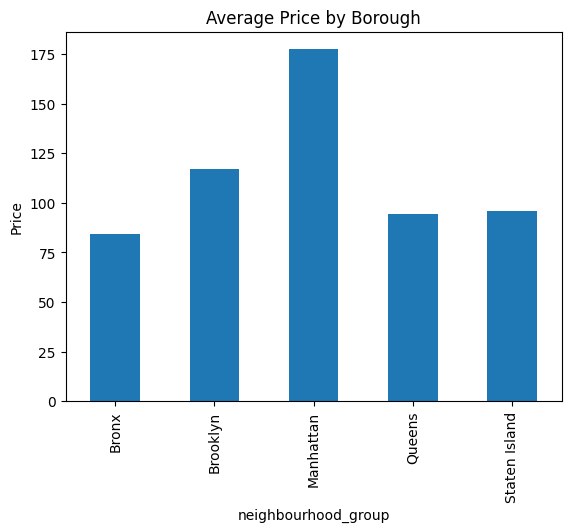

In [12]:
import matplotlib.pyplot as plt

borough_price = df.groupby("neighbourhood_group")["price"].mean()

borough_price.plot(kind="bar")
plt.title("Average Price by Borough")
plt.ylabel("Price")
plt.show()

In [13]:
df.groupby("room_type")["estimated_revenue"].mean().sort_values(ascending=False)

room_type
Entire home/apt    24240.651315
Private room       10300.994837
Shared room         9582.839965
Name: estimated_revenue, dtype: float64

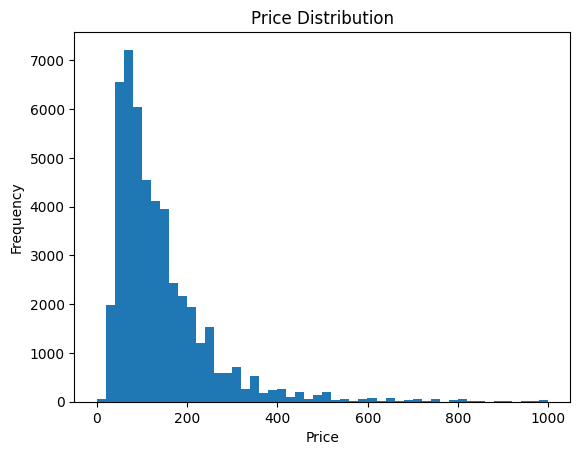

In [14]:
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [15]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [16]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


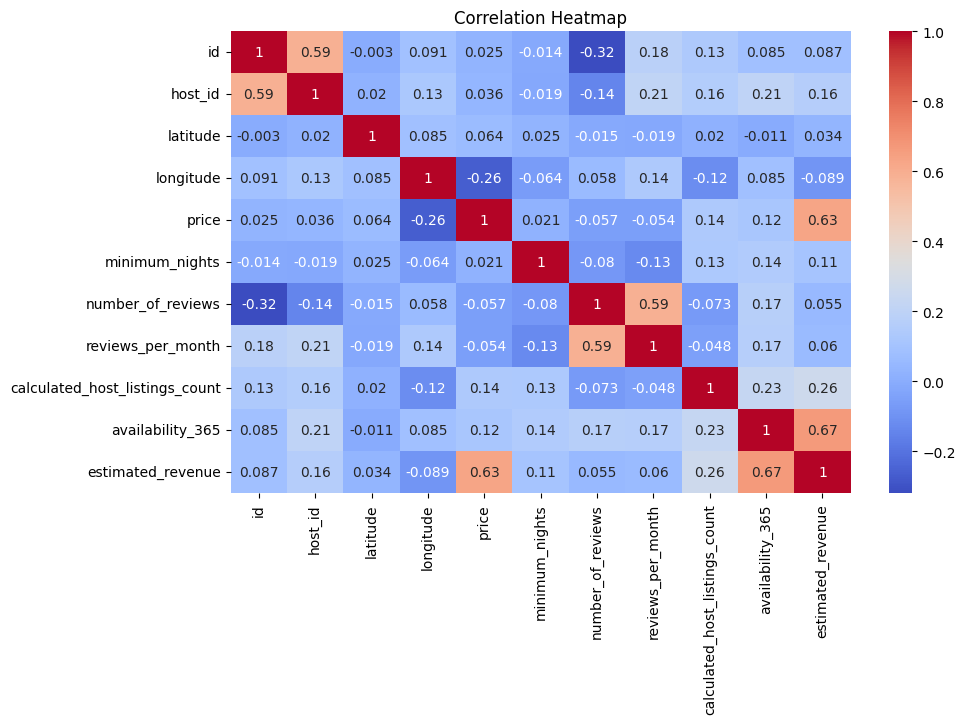

In [17]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
df.groupby("neighbourhood")["estimated_revenue"].mean().sort_values(ascending=False).head(10)

neighbourhood
Fort Wadsworth        292000.000000
Willowbrook            87399.000000
Neponsit               70670.000000
Mill Basin             57636.500000
Riverdale              52790.800000
Eastchester            49518.384615
Midtown                46268.318003
Theater District       46258.687719
Financial District     46130.536486
Flatiron District      45229.578947
Name: estimated_revenue, dtype: float64

In [19]:
df.groupby("neighbourhood")["id"].count().sort_values(ascending=False).head(10)

neighbourhood
Williamsburg          3908
Bedford-Stuyvesant    3701
Harlem                2650
Bushwick              2463
Hell's Kitchen        1948
Upper West Side       1941
East Village          1839
Upper East Side       1782
Crown Heights         1561
Midtown               1522
Name: id, dtype: int64

In [20]:
df[df["neighbourhood"] == "Fort Wadsworth"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,estimated_revenue
25386,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,NaN,0.0,3,365,292000


In [21]:
neigh_counts = df["neighbourhood"].value_counts()

# Keep only neighborhoods with at least 20 listings
valid_neigh = neigh_counts[neigh_counts >= 20].index

filtered_df = df[df["neighbourhood"].isin(valid_neigh)]

filtered_df.groupby("neighbourhood")["estimated_revenue"].mean().sort_values(ascending=False).head(10)

neighbourhood
Midtown               46268.318003
Theater District      46258.687719
Financial District    46130.536486
Flatiron District     45229.578947
Tribeca               41357.831250
Murray Hill           40002.670124
Far Rockaway          34375.931034
Arverne               33071.934211
SoHo                  30303.528736
Hell's Kitchen        29174.424025
Name: estimated_revenue, dtype: float64